# Coursera Capstone Project

## Week 5 Peer Reviewed Notebook

### This Notebook will import population data from Wake County, North Carolina;  identify selected pizza and Italian restuarants; merge population density with number of competing resturants by Census Tract.

### 1) Import all the necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [13]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # plotting library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

### 2) Now that the libraries are imported, the following code imports a .csv file of the population by Census Tract for Wake County.

The data was scrubbed from Wake County Open Data website.  File was massaged to eliminate unnecessary columns and with new column names before the upload.
Hidden cell includes IBM Cloud credentials.

In [14]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_wcpop = pd.read_csv(body)
df_wcpop.head()

,OBJECTID,Population,Land_Area,Population_Density,Latitude,Longitude,NAMELSAD10,GEOID10
0,1,4567,4.682359,975.363060,35.808957,-78.915059,Census Tract 534.10,37183053410
1,2,4672,4.088491,1142.719893,35.784092,-78.762571,Census Tract 535.17,37183053517
2,3,7605,108.199695,70.286705,36.015825,-78.651009,Census Tract 539,37183053900
3,4,3610,4.115246,877.225809,35.756804,-78.759858,Census Tract 535.05,37183053505
4,5,3186,33.858770,94.096744,35.736014,-78.477742,Census Tract 541.09,37183054109


In [17]:
df_wcpop.shape
#187

(187, 8)

### So, there are 187 Census Tracts in Wake County.  Now I will map them.

### Let's take a look at how the Population and Population Desnity of each Census Tract is broken down.

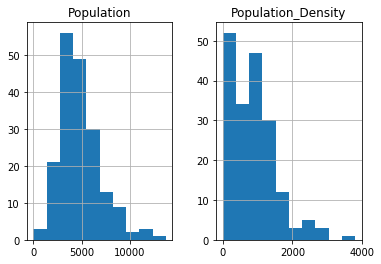

In [102]:
#Build Histograms

viz = df_wcpop[['Population','Population_Density']]
viz.hist()
import matplotlib.pyplot as plt
plt.show()

#### Looks like the Census tracts have a population skewed to just under 5000 per tract, and a population density skewed towards 10-1500 per tract.

### Import the coordinates of Wake County (from Google search). Use folium to generate the map.

In [18]:
latitude = 35.8032
longitude= -78.5661

In [103]:
map_wake_county = folium.Map(location=[latitude, longitude], zoom_start=10.3)

# add markers to map
for lat, lng, label in zip(df_wcpop['Latitude'], df_wcpop['Longitude'], df_wcpop['OBJECTID']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_wake_county)  
    
map_wake_county

### These maps never want to print on Github, so look for them in the written report.

### 3) Utilizing the Foursquare API to explore the neighborhoods and segment them. Foursquare credentials referenced and hidden in the following cell. Using Foursquare version 20180604.

In [11]:
# The code was removed by Watson Studio for sharing.

### 4) Replicating the function to repeat the same process from the Manhattan lab example.  This code will produce all the venues in Wake County with its location.

In [12]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius of 5km

def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

wc_venues = getNearbyVenues(names=df_wcpop['OBJECTID'],
                                   latitudes=df_wcpop['Latitude'],
                                   longitudes=df_wcpop['Longitude']
                                  )

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187


### It looks like there are values returned for all 187 Census Tracts in Wake County, NC.

### 5) Produce the dataframe shape and header for the Fourquare data.

In [20]:
print(wc_venues.shape)
wc_venues.head()
#16047

(16047, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,35.808957,-78.915059,American Tobacco Trail - New Hope Church Rd Ac...,35.816495,-78.927656,Trail
1,1,35.808957,-78.915059,Andia's Homemade Ice Cream,35.820146,-78.901185,Ice Cream Shop
2,1,35.808957,-78.915059,USA Baseball National Training Complex,35.797485,-78.892539,Baseball Stadium
3,1,35.808957,-78.915059,Los Tres Magueyes,35.819912,-78.900982,Mexican Restaurant
4,1,35.808957,-78.915059,Thomas E. Brooks Park,35.794564,-78.895054,Park


### Looks like 16,047 venues were returned.

### 6) Filter the Venue category to only return Italian or Pizza establishments

In [30]:
df_scrub1=wc_venues[wc_venues['Venue Category'].str.contains("Pizza") | wc_venues['Venue Category'].str.contains("Italian")| wc_venues['Venue Category'].str.contains("italian")| wc_venues['Venue Category'].str.contains("pizza")]
print(df_scrub1.shape)
df_scrub1.head(20)
#938

(938, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,1,35.808957,-78.915059,MOD Pizza,35.823656,-78.903501,Pizza Place
16,1,35.808957,-78.915059,Brixx Wood Fired Pizza,35.847511,-78.889840,Pizza Place
28,1,35.808957,-78.915059,Stellino's,35.848652,-78.889156,Italian Restaurant
33,1,35.808957,-78.915059,New York Pizza,35.785960,-78.872490,Pizza Place
72,1,35.808957,-78.915059,Cicis,35.784665,-78.870492,Pizza Place
148,2,35.784092,-78.762571,Pizzeria Faulisi,35.787773,-78.777807,Pizza Place
180,2,35.784092,-78.762571,Olive Garden,35.760563,-78.742842,Italian Restaurant
242,4,35.756804,-78.759858,Olive Garden,35.760563,-78.742842,Italian Restaurant
345,7,35.773234,-78.460832,Grand Street Pizza,35.796587,-78.492500,Pizza Place
359,7,35.773234,-78.460832,Slice Of NY Pizza,35.797972,-78.506541,Pizza Place


#### Looks like the list is down to 938 venues.  

### 7) Scrub out nations chains of Papa Johns, Dominos, Little Caesars, and Pizza Hut.

#### This will be done in 4 iterations.

In [31]:
#1 iteration

indexNames = df_scrub1[df_scrub1['Venue'] == 'Little Caesars Pizza'].index
df_scrub1.drop(indexNames , inplace=True)
print(df_scrub1.shape)
df_scrub1.head()
#928

(928, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,1,35.808957,-78.915059,MOD Pizza,35.823656,-78.903501,Pizza Place
16,1,35.808957,-78.915059,Brixx Wood Fired Pizza,35.847511,-78.889840,Pizza Place
28,1,35.808957,-78.915059,Stellino's,35.848652,-78.889156,Italian Restaurant
33,1,35.808957,-78.915059,New York Pizza,35.785960,-78.872490,Pizza Place
72,1,35.808957,-78.915059,Cicis,35.784665,-78.870492,Pizza Place


#### Dataframe has removed 10 Little Caesar venues.

In [32]:
#2 iteration

indexNames = df_scrub1[df_scrub1['Venue'] == "Papa John's Pizza"].index
df_scrub1.drop(indexNames , inplace=True)
print(df_scrub1.shape)
df_scrub1.head()
#903

(903, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,1,35.808957,-78.915059,MOD Pizza,35.823656,-78.903501,Pizza Place
16,1,35.808957,-78.915059,Brixx Wood Fired Pizza,35.847511,-78.889840,Pizza Place
28,1,35.808957,-78.915059,Stellino's,35.848652,-78.889156,Italian Restaurant
33,1,35.808957,-78.915059,New York Pizza,35.785960,-78.872490,Pizza Place
72,1,35.808957,-78.915059,Cicis,35.784665,-78.870492,Pizza Place


#### Dataframe has removed 25 Papa John's venues.

In [33]:
#3 iteration

indexNames = df_scrub1[df_scrub1['Venue'] == "Domino's Pizza"].index
df_scrub1.drop(indexNames , inplace=True)
print(df_scrub1.shape)
df_scrub1.head()
#877

(877, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,1,35.808957,-78.915059,MOD Pizza,35.823656,-78.903501,Pizza Place
16,1,35.808957,-78.915059,Brixx Wood Fired Pizza,35.847511,-78.889840,Pizza Place
28,1,35.808957,-78.915059,Stellino's,35.848652,-78.889156,Italian Restaurant
33,1,35.808957,-78.915059,New York Pizza,35.785960,-78.872490,Pizza Place
72,1,35.808957,-78.915059,Cicis,35.784665,-78.870492,Pizza Place


#### Dataframe has removed 26 Domino's venues.

In [34]:
#4 iteration

indexNames = df_scrub1[df_scrub1['Venue'] == "Pizza Hut"].index
df_scrub1.drop(indexNames , inplace=True)
print(df_scrub1.shape)
df_scrub1.head()
#852

(852, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,1,35.808957,-78.915059,MOD Pizza,35.823656,-78.903501,Pizza Place
16,1,35.808957,-78.915059,Brixx Wood Fired Pizza,35.847511,-78.889840,Pizza Place
28,1,35.808957,-78.915059,Stellino's,35.848652,-78.889156,Italian Restaurant
33,1,35.808957,-78.915059,New York Pizza,35.785960,-78.872490,Pizza Place
72,1,35.808957,-78.915059,Cicis,35.784665,-78.870492,Pizza Place


#### Dataframe has removed 25 Pizza Hut venues. This leave 852 venues throughout the county.

### 8) Now we are left with 852 potential competitors to our new pizzeria in Wake County.  Let's group them by Census Tract.

In [86]:
#Adding in a column to the dataframe as a dummy counter.

df_scrub1.insert(6, "Count", 1, allow_duplicates=True) 
df_scrub1.head(25)

,OBJECTID,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Count,Count,Venue Category
10,1,35.808957,-78.915059,MOD Pizza,35.823656,-78.903501,1,1,Pizza Place
16,1,35.808957,-78.915059,Brixx Wood Fired Pizza,35.847511,-78.889840,1,1,Pizza Place
28,1,35.808957,-78.915059,Stellino's,35.848652,-78.889156,1,1,Italian Restaurant
33,1,35.808957,-78.915059,New York Pizza,35.785960,-78.872490,1,1,Pizza Place
72,1,35.808957,-78.915059,Cicis,35.784665,-78.870492,1,1,Pizza Place
148,2,35.784092,-78.762571,Pizzeria Faulisi,35.787773,-78.777807,1,1,Pizza Place
180,2,35.784092,-78.762571,Olive Garden,35.760563,-78.742842,1,1,Italian Restaurant
242,4,35.756804,-78.759858,Olive Garden,35.760563,-78.742842,1,1,Italian Restaurant
345,7,35.773234,-78.460832,Grand Street Pizza,35.796587,-78.492500,1,1,Pizza Place
359,7,35.773234,-78.460832,Slice Of NY Pizza,35.797972,-78.506541,1,1,Pizza Place


In [37]:
#Renaming Neighborhood column to OBJECTID so it can be merged with the wcpop df from earlier.

df2 = df_scrub1
df2.rename(columns = {'Neighborhood':'OBJECTID'}, inplace = True) 
df2.head(20)

,OBJECTID,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Count,Venue Category
10,1,35.808957,-78.915059,MOD Pizza,35.823656,-78.903501,1,Pizza Place
16,1,35.808957,-78.915059,Brixx Wood Fired Pizza,35.847511,-78.889840,1,Pizza Place
28,1,35.808957,-78.915059,Stellino's,35.848652,-78.889156,1,Italian Restaurant
33,1,35.808957,-78.915059,New York Pizza,35.785960,-78.872490,1,Pizza Place
72,1,35.808957,-78.915059,Cicis,35.784665,-78.870492,1,Pizza Place
148,2,35.784092,-78.762571,Pizzeria Faulisi,35.787773,-78.777807,1,Pizza Place
180,2,35.784092,-78.762571,Olive Garden,35.760563,-78.742842,1,Italian Restaurant
242,4,35.756804,-78.759858,Olive Garden,35.760563,-78.742842,1,Italian Restaurant
345,7,35.773234,-78.460832,Grand Street Pizza,35.796587,-78.492500,1,Pizza Place
359,7,35.773234,-78.460832,Slice Of NY Pizza,35.797972,-78.506541,1,Pizza Place


In [61]:
# Grouping the number of venues by OBJECTID/Census Tract

df3 = df2.groupby('OBJECTID').count()
df3.head(10)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Count,Venue Category
OBJECTID,,,,,,,
1,5,5,5,5,5,5,5
2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1
7,5,5,5,5,5,5,5
8,1,1,1,1,1,1,1
9,2,2,2,2,2,2,2
10,4,4,4,4,4,4,4
11,9,9,9,9,9,9,9
12,10,10,10,10,10,10,10


In [39]:
# Discarding unnecessary columns from the data frame

df4 = df3
del df4 ['Neighborhood Latitude']
del df4 ['Neighborhood Longitude']
del df4 ['Venue Latitude']
del df4 ['Venue Longitude']
del df4 ['Count']
del df4 ['Venue Category']
df4.head(20)

,Venue
OBJECTID,
1,5
2,2
4,1
7,5
8,1
9,2
10,4
11,9
12,10


In [62]:
# Renaming column Venues to Competitors

df5 = df4
df5.rename(columns = {'Venue':'Competitors'}, inplace = True) 
df5.head(10)

,Competitors
OBJECTID,
1,5
2,2
4,1
7,5
8,1
9,2
10,4
11,9
12,10


### 8) Merge the two dataframes, so we can assess the best place to locate the new pizzeria.

In [41]:
# Recall the original Wake County Population dataframe.

df_wcpop.head()

,OBJECTID,Population,Land_Area,Population_Density,Latitude,Longitude,NAMELSAD10,GEOID10
0,1,4567,4.682359,975.363060,35.808957,-78.915059,Census Tract 534.10,37183053410
1,2,4672,4.088491,1142.719893,35.784092,-78.762571,Census Tract 535.17,37183053517
2,3,7605,108.199695,70.286705,36.015825,-78.651009,Census Tract 539,37183053900
3,4,3610,4.115246,877.225809,35.756804,-78.759858,Census Tract 535.05,37183053505
4,5,3186,33.858770,94.096744,35.736014,-78.477742,Census Tract 541.09,37183054109


In [42]:
# Recall the number of competitors by Census Tract

df5.head()

,Competitors
OBJECTID,
1,5
2,2
4,1
7,5
8,1


In [44]:
#Merge the two dataframes

left=df_wcpop
right=df5
result = pd.merge(left, right, on='OBJECTID')
result.head()

,OBJECTID,Population,Land_Area,Population_Density,Latitude,Longitude,NAMELSAD10,GEOID10,Competitors
0,1,4567,4.682359,975.363060,35.808957,-78.915059,Census Tract 534.10,37183053410,5
1,2,4672,4.088491,1142.719893,35.784092,-78.762571,Census Tract 535.17,37183053517,2
2,4,3610,4.115246,877.225809,35.756804,-78.759858,Census Tract 535.05,37183053505,1
3,7,6531,21.292342,306.729997,35.773234,-78.460832,Census Tract 541.08,37183054108,5
4,8,5408,40.847656,132.394378,35.768668,-78.390615,Census Tract 544.02,37183054402,1


In [48]:
#Insert a calculated column, called Competition_Density.  Divide Population_Desnity by Competitors.

result2=result
result2['Competition_Density'] = result2['Population_Density']/result2['Competitors']
result2.head()

,OBJECTID,Population,Land_Area,Population_Density,Latitude,Longitude,NAMELSAD10,GEOID10,Competitors,Competition_Density
0,1,4567,4.682359,975.363060,35.808957,-78.915059,Census Tract 534.10,37183053410,5,195.072612
1,2,4672,4.088491,1142.719893,35.784092,-78.762571,Census Tract 535.17,37183053517,2,571.359946
2,4,3610,4.115246,877.225809,35.756804,-78.759858,Census Tract 535.05,37183053505,1,877.225809
3,7,6531,21.292342,306.729997,35.773234,-78.460832,Census Tract 541.08,37183054108,5,61.345999
4,8,5408,40.847656,132.394378,35.768668,-78.390615,Census Tract 544.02,37183054402,1,132.394378


In [49]:
result2.shape

(171, 10)

In [51]:
#Sort the dataframe in descending order on Competition_Density

result2.sort_values(by=['Competition_Density'], inplace=True, ascending=False)
result2.head()

,OBJECTID,Population,Land_Area,Population_Density,Latitude,Longitude,NAMELSAD10,GEOID10,Competitors,Competition_Density
125,134,4196,1.104549,3798.835543,35.777891,-78.684019,Census Tract 524.09,37183052409,2,1899.417772
126,135,6413,3.862827,1660.183073,35.778728,-78.733541,Census Tract 524.06,37183052406,1,1660.183073
138,147,3490,2.634857,1324.550061,35.771635,-78.751730,Census Tract 535.16,37183053516,1,1324.550061
130,139,4255,1.738790,2447.104021,35.781942,-78.665827,Census Tract 511.02,37183051102,2,1223.552011
24,28,4696,1.635126,2871.949929,35.788013,-78.688316,Census Tract 511.01,37183051101,3,957.316643


### Let's look at the data visually.  First a histogram of the Competition Density.

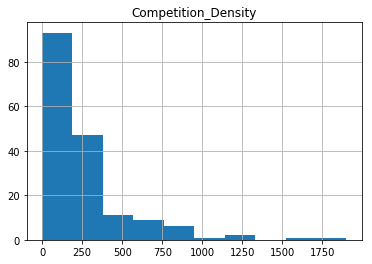

In [105]:
# Competition Density Histogram

viz = result2[['Competition_Density']]
viz.hist()
import matplotlib.pyplot as plt
plt.show()

###  There are definitely some outliers.  Try using a box plot to visualize it again.

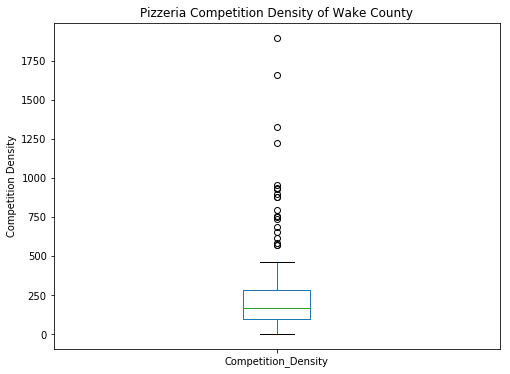

In [106]:
# Boxplot the results of Competition Density

df_boxplot = result2[['Competition_Density']]

df_boxplot.plot(kind='box', figsize=(8, 6))

plt.title('Pizzeria Competition Density of Wake County')
plt.ylabel('Competition Density')

plt.show()

### Maybe a scatter plot, too.

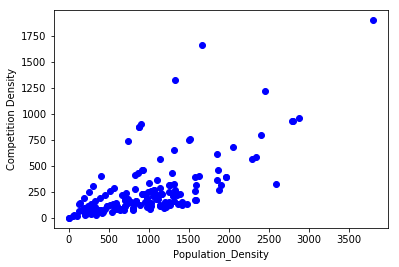

In [108]:
# Scatter plot of the Competition Density

plt.scatter(result2.Population_Density, result2.Competition_Density,  color='blue')
plt.xlabel("Population_Density")
plt.ylabel("Competition Density")
plt.show()

### Originally, the top-5 suggestions were going to be made.  However, the box plot show four (4) very strong outliers.  Let's revise the recommendation from 5 to 4, based on this new information.

In [109]:
#Extract the top-5 Census Tracts (OBJECTID).  This is the final answer.

Final_df = result2.loc[(result2['Competition_Density'] > 1220.0)]
Final_df

,OBJECTID,Population,Land_Area,Population_Density,Latitude,Longitude,NAMELSAD10,GEOID10,Competitors,Competition_Density
125,134,4196,1.104549,3798.835543,35.777891,-78.684019,Census Tract 524.09,37183052409,2,1899.417772
126,135,6413,3.862827,1660.183073,35.778728,-78.733541,Census Tract 524.06,37183052406,1,1660.183073
138,147,3490,2.634857,1324.550061,35.771635,-78.751730,Census Tract 535.16,37183053516,1,1324.550061
130,139,4255,1.738790,2447.104021,35.781942,-78.665827,Census Tract 511.02,37183051102,2,1223.552011


## Final Answer:  Suggest to your friend to locate his new pizzeria within the following five (5) OBJECTIDs: 134, 135, 147, and 139!

### 9) Map the location of the best five locations to place the new pizzeria.

In [110]:
map_wake_county = folium.Map(location=[latitude, longitude], zoom_start=10.3)

# add markers to map
for lat, lng, label in zip(Final_df['Latitude'], Final_df['Longitude'], Final_df['OBJECTID']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_wake_county)  
    
map_wake_county

### These maps never want to print on Github, so look for them in the written report.

### 10) Looking at the final grouping, the number of Census Tracts dropped from 187 to 171.  The reason was some tracts had no pizzerias nor Italian resturants.

### It's worth taking a look, to see the population densities of these missing tracts are not missed opportunities.

In [ ]:
#ObjectID's with no pizzerias nor Italian resturants.

3, 5, 6, 42, 43, 51, 64, 86, 157, 160, 161, 162, 165, 166, 167, 178

In [83]:
subsetDataFrame = df_wcpop[df_wcpop['OBJECTID'].isin([3, 5, 6, 42, 43, 51, 64, 86, 157, 160, 161, 162, 165, 166, 167, 178]) ]
subsetDataFrame

,OBJECTID,Population,Land_Area,Population_Density,Latitude,Longitude,NAMELSAD10,GEOID10
2,3,7605,108.199695,70.286705,36.015825,-78.651009,Census Tract 539,37183053900
4,5,3186,33.858770,94.096744,35.736014,-78.477742,Census Tract 541.09,37183054109
5,6,5648,93.506728,60.402071,35.871812,-78.360604,Census Tract 543.01,37183054301
41,42,3318,29.050411,114.215252,35.978970,-78.665727,Census Tract 538.04,37183053804
42,43,3737,11.885501,314.416700,35.960815,-78.693149,Census Tract 538.03,37183053803
50,51,2021,19.548598,103.383373,35.853275,-78.469168,Census Tract 541.11,37183054111
63,64,3886,33.645535,115.498238,35.836862,-78.411865,Census Tract 544.03,37183054403
85,86,2060,10.413494,197.820251,35.955480,-78.638863,Census Tract 538.05,37183053805
156,157,4388,42.237359,103.889071,35.713578,-78.531464,Census Tract 528.07,37183052807
159,160,13750,17.829267,771.203886,35.742080,-78.556768,Census Tract 528.06,37183052806


### Conclusion:  There are no missed opportunities, here, with these tracts.  None of these 16 Census Tracts have a population density larger than the Competition Density calculated in step 8.

### Thank you for reading this notebook!